<a href="https://colab.research.google.com/github/leen204/mining-project/blob/main/DATA%20MINING%20NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal


Goal: The goal of this project is to analyze the dataset, identify significant risk factors, and develop predictive models to assist in the early detection and understanding of Alzheimer’s Disease.


#Source


https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

#Dataset information


In order to efficiently retrive the dataset's information we need to import it as follows:


In [148]:
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')
df=df.drop(columns='DoctorInCharge') #This is a column with the same value for all objects so we removed it because it caused an error in the run

after that we can easily obtain the **Dataset Information:**

Class label: Diagnosis

In [132]:
attribute_info = pd.DataFrame({
    'NameOfAttribute' : df.columns,
    'DataType' : df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}\n")
print(f"Number of Objects: {len(df)}\n")
print(f"Attirbutes along with their types: \n")
print(attribute_info)
print('\n')



Number of attributes: 34

Number of Objects: 2149

Attirbutes along with their types: 

              NameOfAttribute DataType
0                   PatientID    int64
1                         Age    int64
2                      Gender    int64
3                   Ethnicity    int64
4              EducationLevel    int64
5                         BMI  float64
6                     Smoking    int64
7          AlcoholConsumption  float64
8            PhysicalActivity  float64
9                 DietQuality  float64
10               SleepQuality  float64
11    FamilyHistoryAlzheimers    int64
12      CardiovascularDisease    int64
13                   Diabetes    int64
14                 Depression    int64
15                 HeadInjury    int64
16               Hypertension    int64
17                 SystolicBP    int64
18                DiastolicBP    int64
19           CholesterolTotal  float64
20             CholesterolLDL  float64
21             CholesterolHDL  float64
22   Cholestero

#Neccessary imports

In [133]:
#All neccessary imports for our project are included below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Sampling


firts we took a sample of 100 person from the data set

In [134]:
sample_size = 100  # sample size
strat_sample, _ = train_test_split(df, test_size=(1 - sample_size / len(df)), stratify=df["Diagnosis"], random_state=42)

#Display the class distribution in the sample to verify
print("Sample class distribution:\n", strat_sample["Diagnosis"].value_counts(normalize=True) * 100)


Sample class distribution:
 Diagnosis
0    65.0
1    35.0
Name: proportion, dtype: float64


**Results Description:**

the sample class distribution turned out to be:

65% Diagnosed

35% Not Diagnosed


and this is a slightly imbalanced sample.

# show the Missing values

we will check every column and row for any missing values that can affect the dataset quality

In [135]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Difficul

**Result Explanation:**

after carefully examining each column and row, we notice that there are no missing values, and all columns are complete.



#**Summarization of the data using graphs before data pre-processing**

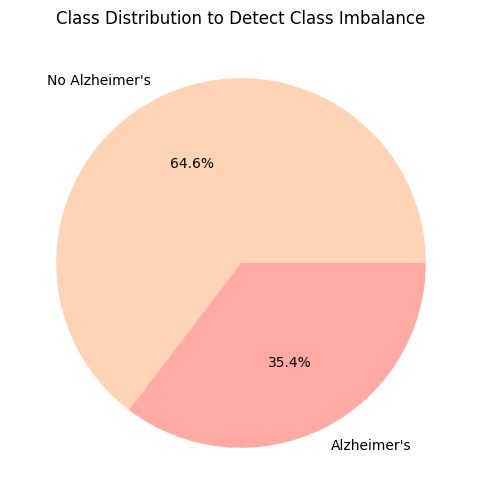

In [136]:
df = pd.read_csv('alzheimers_disease_data.csv')

diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)
class_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors =  ["#FFD3B5", "#FFAAA5"]
 )
plt.title('Class Distribution to Detect Class Imbalance')
plt.show()

**Result Explanation:**

We used a pie chart to illustrate the percentage distribution of Alzheimer's diagnosis which is the class label in the dataset, resulting in **64.6% No Alzheimer's** and **35.4% Alzheimer's**.

and this is a slightly imbalanced dataset.

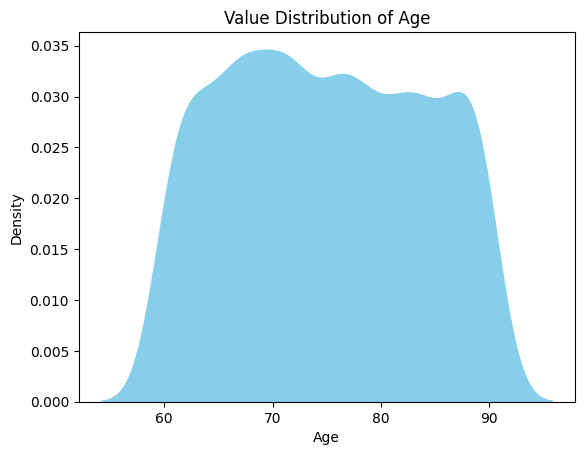

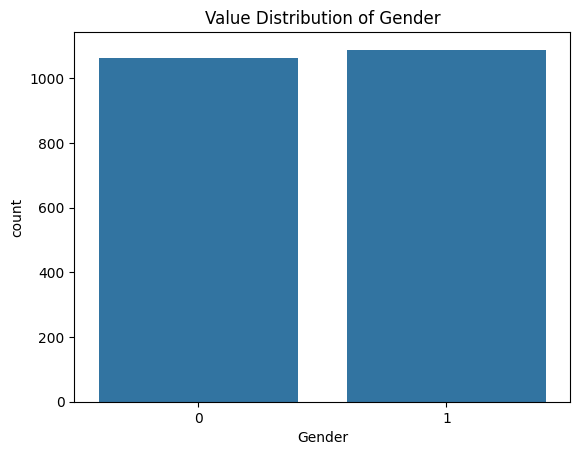

In [137]:
sns.kdeplot(df['Age'], fill=True, color='skyblue', alpha=1)
plt.title('Value Distribution of Age')
plt.show()

sns.countplot(x=df['Gender'])
plt.title('Value Distribution of Gender')
plt.show()

**Result Explanation:**

**Density Plot:**

The density plot illustrates how ages of individuals are distributed, as we can see the age value that takes up most of the graph is between 60-70
which is the most seen in the dataset


**The Bar Chart:**

The bar chart shows the distribution of gender in dataset,
0 = female , 1 = male.

both genders almost apeared equally in the dataset except that there is slightly higher number of males


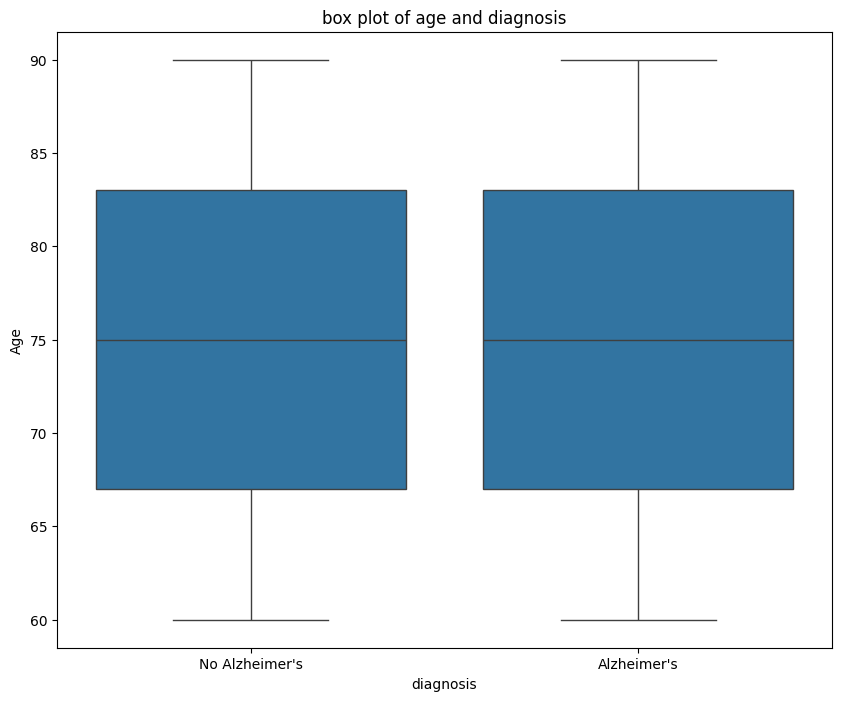

In [138]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('box plot of age and diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Age')

plt.show()

**Boxplot Discription:**

The boxplot shows the distribution of age for individuals with and without Alzheimer’s, indicating that the majority of cases are within the age range of 70 to 80 years, after examining this box plot we can also determine other values such as the minimum and maximum value of each box plot along with any outliers. as we can see both box plots have a maximum value of 90 and a minimum value of 60 and they're both clear of any outliers.

We will construct a scatter plot based on our sample in order to detect any patterns

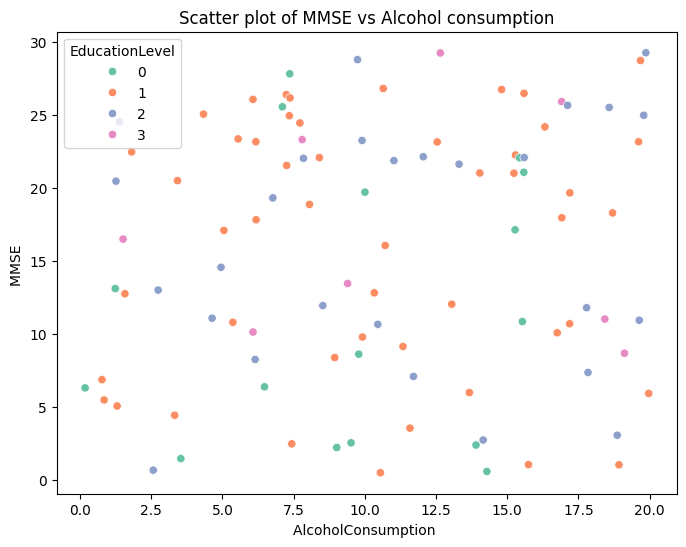

In [139]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=strat_sample, x='AlcoholConsumption', y='MMSE' , hue='EducationLevel', palette='Set2')


plt.title('Scatter plot of MMSE vs Alcohol consumption')
plt.xlabel('AlcoholConsumption ')
plt.ylabel('MMSE ')
plt.show()

**Result Explanation:**

The scatter plot displays the relationship between MMSE scores and alcohol consumption across different education levels. The points are dispersed randomly without forming a clear pattern or trend, suggesting that there is no significant or direct correlation between alcohol consumption and cognitive performance. Additionally, the varying colors representing education levels do not show a noticeable clustering, indicating that education level does not have a straightforward impact on this relationship either.

**We will construct a bar chart graph to check if there's a relationship between smoking and Alzheimer's disease**

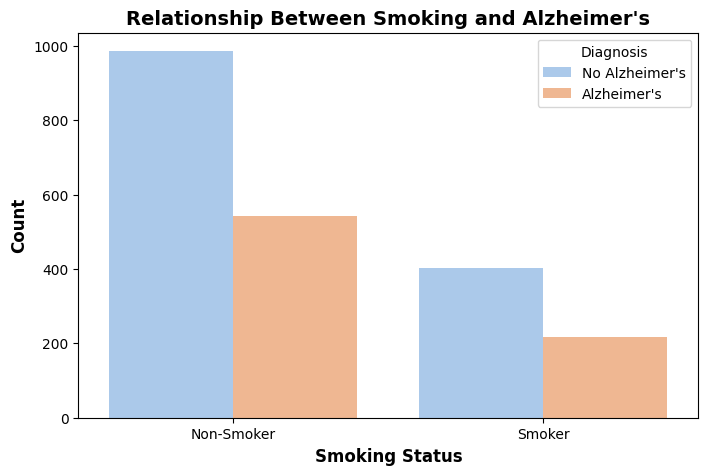

In [140]:
df = pd.read_csv('alzheimers_disease_data.csv')
smoking_labels = {0: "Non-Smoker", 1: "Smoker"}
diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Smoking'] = df['Smoking'].map(smoking_labels)
df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)

plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking'], hue=df['Diagnosis'], palette="pastel")

plt.xlabel("Smoking Status", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Relationship Between Smoking and Alzheimer's", fontsize=14, fontweight='bold')
plt.legend(title="Diagnosis")

plt.show()

**Result Explanation:**

We used a bar chart to show the relationship between smoking and Alzheimer's. The results indicate that non-smokers are more common in both groups, but there are still many smokers among Alzheimer's patients.





# Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max., Mode.

Using the summary_stats() function, we can derive key insights from the dataset. Based on these summary statistics, several important observations and mode values can be identified.

In [141]:
selected_columns = [
    "Age", "BMI", "SystolicBP", "DiastolicBP", "CholesterolTotal",
    "CholesterolLDL", "CholesterolHDL", "Hypertension","Gender",
    "CardiovascularDisease", "Diabetes", "Diagnosis","MMSE"
]
summary_stats = df[selected_columns].describe()
print(summary_stats)



               Age          BMI   SystolicBP  DiastolicBP  CholesterolTotal  \
count  2149.000000  2149.000000  2149.000000  2149.000000       2149.000000   
mean     74.908795    27.655697   134.264774    89.847836        225.197519   
std       8.990221     7.217438    25.949352    17.592496         42.542233   
min      60.000000    15.008851    90.000000    60.000000        150.093316   
25%      67.000000    21.611408   112.000000    74.000000        190.252963   
50%      75.000000    27.823924   134.000000    91.000000        225.086430   
75%      83.000000    33.869778   157.000000   105.000000        262.031657   
max      90.000000    39.992767   179.000000   119.000000        299.993352   

       CholesterolLDL  CholesterolHDL  Hypertension       Gender  \
count     2149.000000     2149.000000   2149.000000  2149.000000   
mean       124.335944       59.463533      0.148906     0.506282   
std         43.366584       23.139174      0.356079     0.500077   
min         50.2

**Result Explanation:**

**Age**: The ages span from 60 to 90 years, with a median of 75 years and a mean of 74.91 years. The mode is 73 years, indicating a focus on elderly individuals.

**BMI**: BMI values range from 15.01 to 39.99, with a median of 27.82 and a mean of 27.65. The mode is 22.93, reflecting variability in weight, centered around the overweight category.

**MMSE:** is a continuous variable, with a mean of 0.49, a median of 0.48, and a mode of 0.71, indicating variability in cognitive function among individuals.

**SystolicBP**: Systolic blood pressure ranges from 90 to 179, with a median of 134 and a mean of 134.26. The mode is 142, indicating mostly normal to slightly elevated levels.

**DiastolicBP**: Diastolic blood pressure ranges from 60 to 119, with a median of 91 and a mean of 89.85. The mode is 72, showing moderate variability.

**Cholesterol** (Total, LDL, HDL): Total cholesterol (mean: 225.20, mode: 242.37), LDL (mean: 124.33, mode: 56.15), and HDL (mean: 59.46, mode: 33.68) indicate significant variability across individuals.

**Hypertension**: Hypertension is a binary variable, with a mode of 0, meaning most individuals do not have hypertension.

**Cardiovascular** Disease: The mode is 0, indicating most individuals do not have cardiovascular disease.

**Diabetes**: The mode is 1, showing some individuals have diabetes, but it is not widespread.

**Diagnosis**: The mode is 0, indicating most individuals have not been diagnosed positively.

In [142]:
mode_values = df[selected_columns].iloc[0]
print(mode_values)

Age                                  73
BMI                           22.927749
SystolicBP                          142
DiastolicBP                          72
CholesterolTotal              242.36684
CholesterolLDL                56.150897
CholesterolHDL                33.682563
Hypertension                          0
Gender                                0
CardiovascularDisease                 0
Diabetes                              1
Diagnosis                No Alzheimer's
MMSE                          21.463532
Name: 0, dtype: object



# Show the Variance

Variance measures how spread out values are. A higher variance means more dispersion, while a lower variance means values are closer to the mean. Therefore, our variance results indicate:

In [143]:
variance=df[selected_columns].var(numeric_only=True)
print(variance)

Age                        80.824080
BMI                        52.091413
SystolicBP                673.368875
DiastolicBP               309.495923
CholesterolTotal         1809.841576
CholesterolLDL           1880.660612
CholesterolHDL            535.421368
Hypertension                0.126792
Gender                      0.250077
CardiovascularDisease       0.123502
Diabetes                    0.128096
MMSE                       74.186375
dtype: float64


**Result Explanation:**

**SystolicBP, CholesterolTotal, and CholesterolLDL:**

These columns have a high variance with values (673.37, 1809.84, 1880.66) respectively. This indicates a significant level of dispersion, reflecting a wide spread in blood pressure and cholesterol levels.

**Age , BMI, DiastolicBP, CholesterolHDL,Gender,and MMSE:**

These columns exhibit a moderate level of variance with values (80.82, 52.09, 309.50, 535.42, 0.25, and 0.08) respectively. This suggests a noticeable spread in age, BMI, and blood pressure, but not as extreme as the previous group. The variance in Gender (0.25) indicates a nearly equal distribution of males and females, ensuring a fair representation in gender-based analysis

**Hypertension, CardiovascularDisease, Diabetes, and Diagnosis:**

These columns have low variance with values (0.13, 0.12, 0.13, and 0.23) respectively. This indicates that most individuals have similar values in these categories, reflecting limited variability in the dataset.



# Data Preprocessing



**1. Discretization:**

The process of dividing the range of values in an attribute into intervals. we will prefrom this process on the age column that ranges from 60 To 90. The range will be devided into the following 5 intervals (ensuring an equal difference between all intervals) : (60-66) (67-72) (73-78) (79-84) (85-90)





In [144]:
#Specifying the column to discretisize
column_to_discretize = 'Age'
num_of_intervals = 5
labels = ["60-66", "67-72", "73-78", "79-84", "85-90"]

#Discretization Process
df[column_to_discretize] = pd.cut(df[column_to_discretize], bins=num_of_intervals, labels=labels)

print(df[column_to_discretize])

0       73-78
1       85-90
2       73-78
3       73-78
4       85-90
        ...  
2144    60-66
2145    73-78
2146    73-78
2147    73-78
2148    67-72
Name: Age, Length: 2149, dtype: category
Categories (5, object): ['60-66' < '67-72' < '73-78' < '79-84' < '85-90']


**Result Explanation:**

As we can see in the result, each object (Starting from index 0 to 2148) has been assigned to one of the previously mentioned intervals.

2. Noramlization:

The process of changing all the values in a column to fall in a range of [0,1]. This process unifies the scale of all features and gives them an equal weight. Our dataset includes many unormalized columns with different ranges of values in each column so we will preform this process using the MinMaxScaler in order to give all our values equal weight:

Nomralization will be preformed on the following columns:

BMI - Alcohol consumption - Physical Activity - Diet Quality - Sleep Quality - SystolicBP - CholesterolTotal- CholesterolLDL - CholesterolHDL - CholesterolTriglycerides - MMSE - FunctionalAssessment - ADL

In [145]:
#Specifying scaler + Columns
columns_to_normalize = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
scaler = MinMaxScaler()

#Normalization Process
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

#print(df[columns_to_normalize])
print(df[columns_to_normalize])

           BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0     0.316960            0.665183          0.633375     0.133931   
1     0.473058            0.227170          0.762862     0.050995   
2     0.111553            0.978276          0.785408     0.181896   
3     0.752163            0.610751          0.843804     0.743443   
4     0.228472            0.923204          0.631707     0.078698   
...        ...                 ...               ...          ...   
2144  0.965137            0.078006          0.405291     0.655316   
2145  0.114035            0.938860          0.135925     0.289848   
2146  0.018717            0.229779          0.989841     0.811960   
2147  0.011650            0.433901          0.636096     0.125543   
2148  0.731706            0.394686          0.657802     0.794079   

      SleepQuality  SystolicBP  CholesterolTotal  CholesterolLDL  \
0         0.837564    0.584270          0.615567        0.039538   
1         0.525021    0.280899     

**Result Explanation:**

as we can see all of our numerical values fall within a range of [0,1] each value has an equal weight as well.

**3. Removing highly correlated columns:**

In this step, we will detect highly correlated columns using the correlation coeffecient after that we will genrate a correlation matrix to further investigate any correlated columns and remove them to improve the quality of our dataset

Columns to be removed due to high correlation: 0




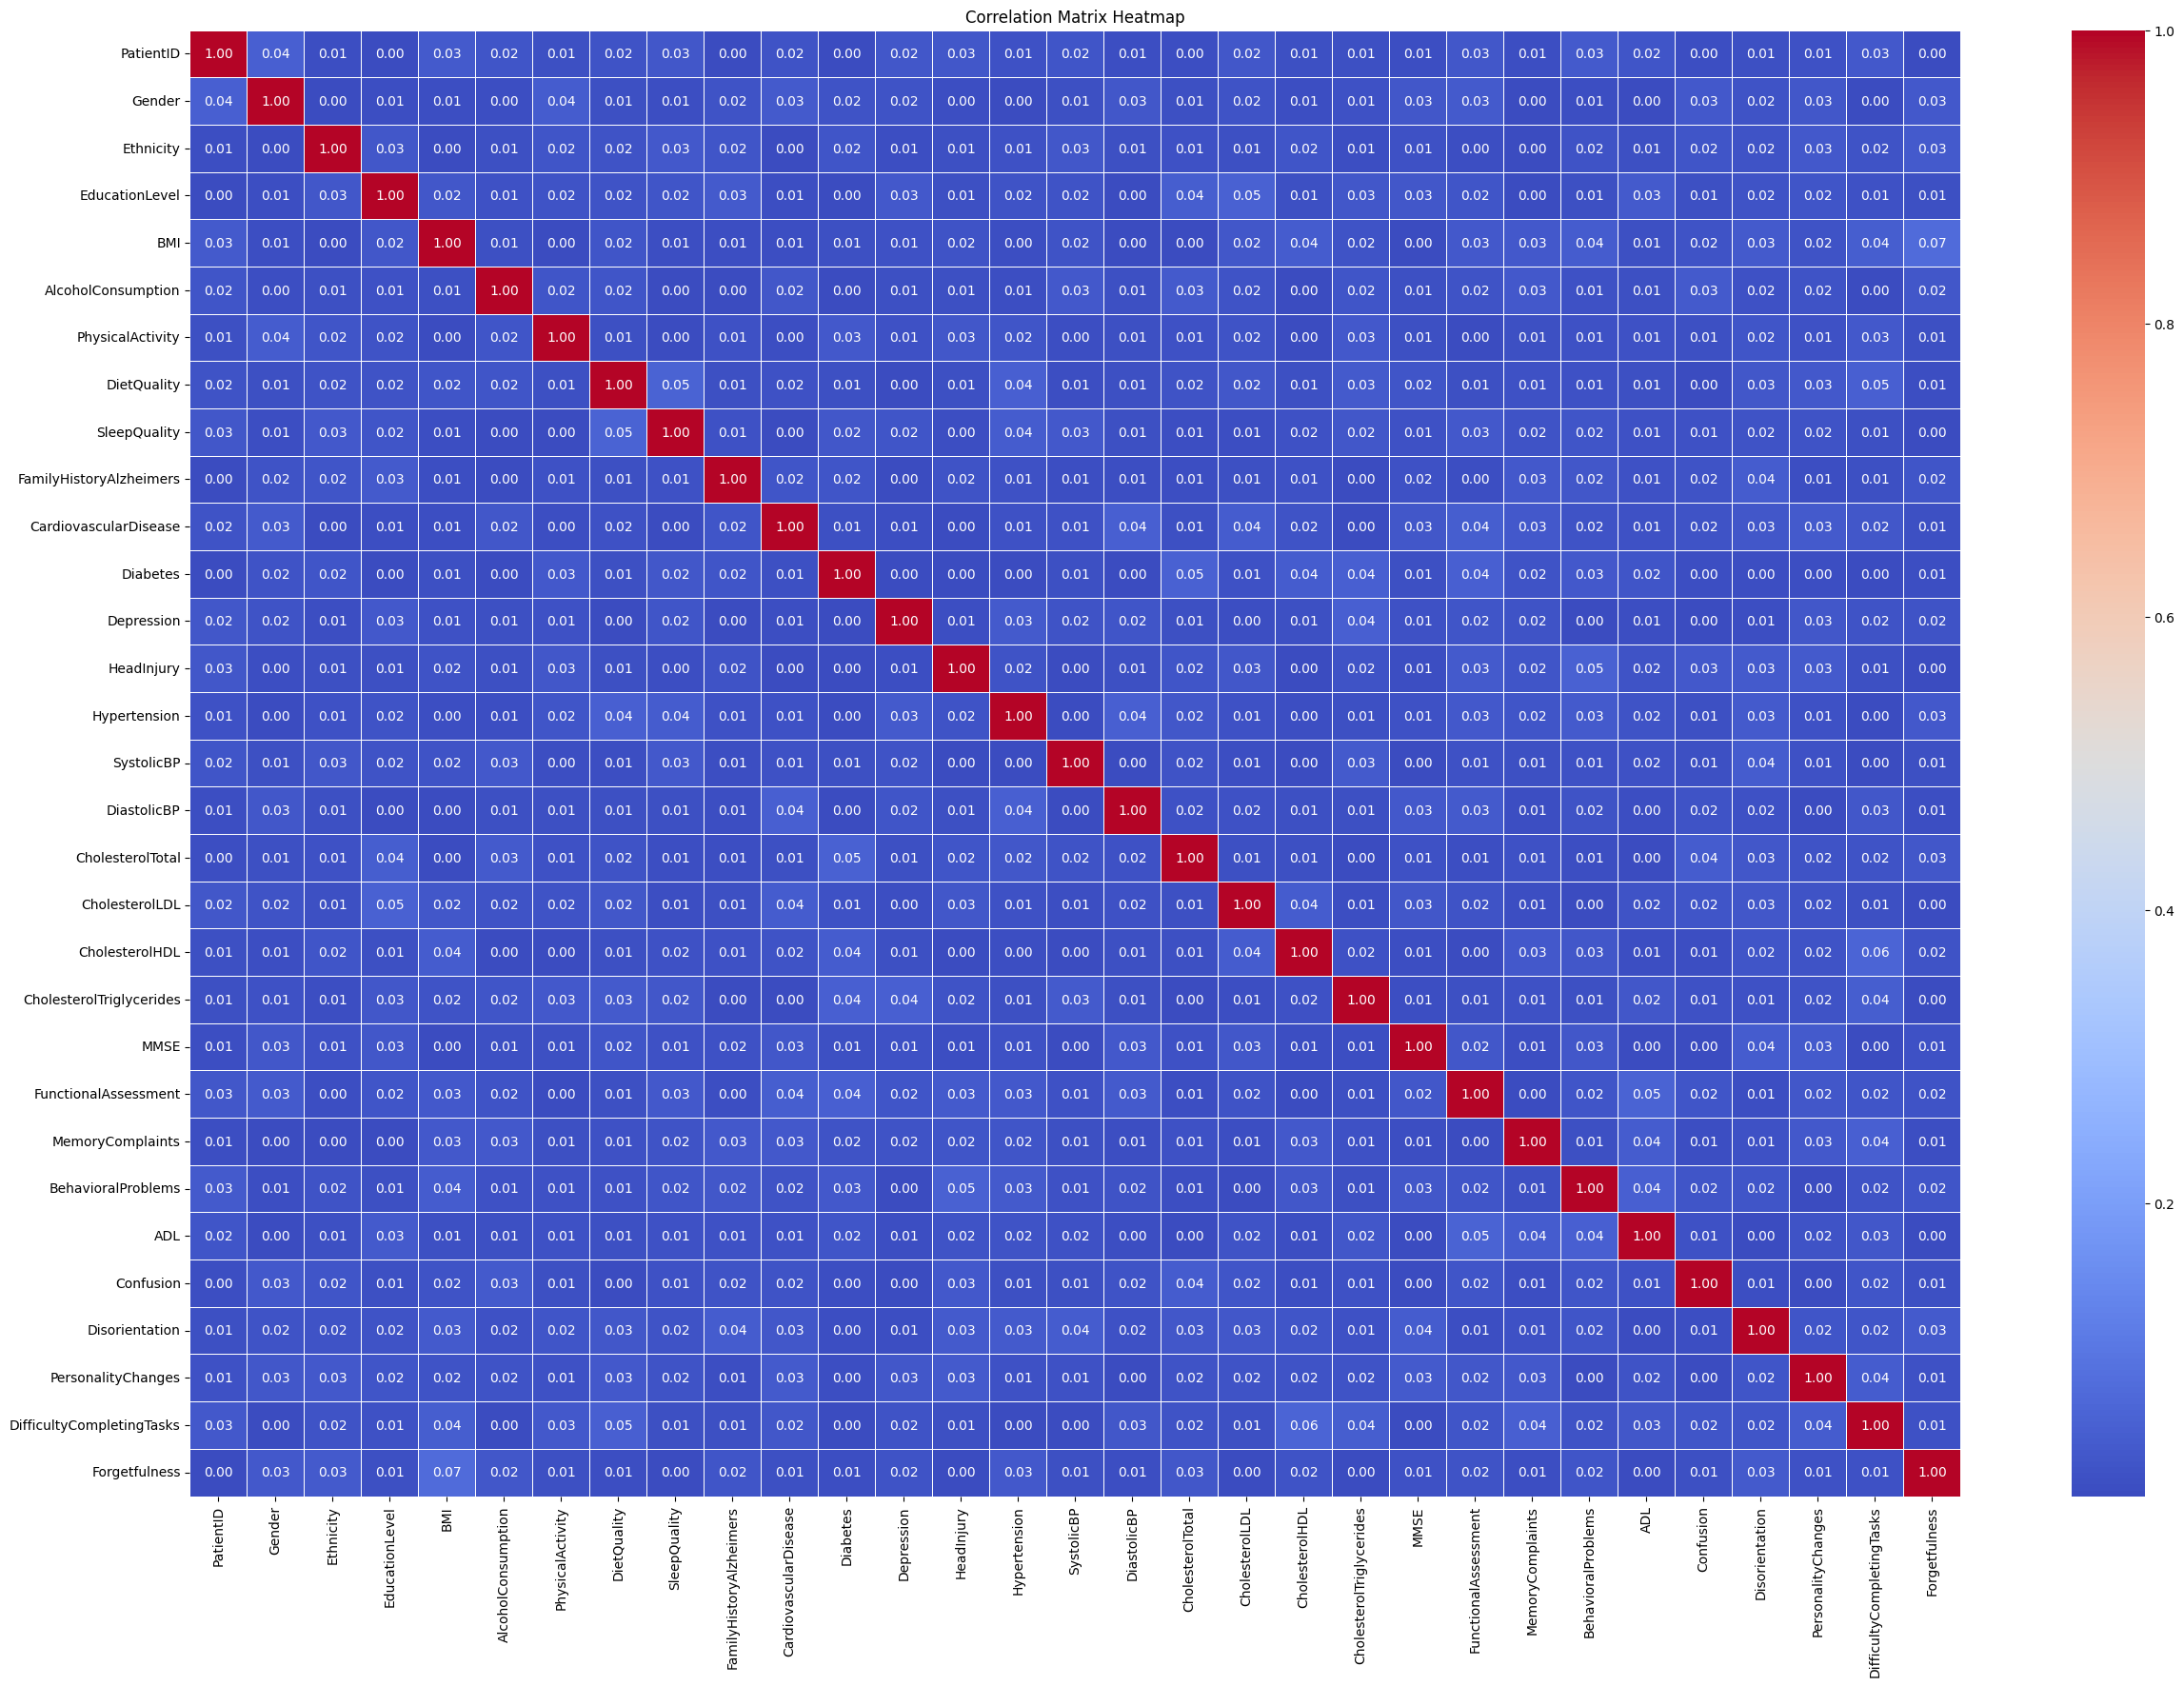

In [146]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True).abs()

# Set correlation threshold
correlation_threshold = 0.75

# Find upper triangle (to avoid duplicate pairs)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to remove
to_remove = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.75)]

# Print columns to be removed
print("Columns to be removed due to high correlation:", len(to_remove))
print('\n')

# Set up the figure size
plt.figure(figsize=(30, 20))

# Create a heatmap using seaborn to visualize our correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title and labels
plt.title("Correlation Matrix Heatmap")
plt.show()

**Result Explanation:**

As we can see there is no correlation that exists between any of our columns we've also included a heatmap that visualizes our correlation matrix and proves this result further. A quick look at the heatmap can show that there is no value above the threshold of 0.75 which means there is no correlation, therefore no further handling will be done.

**4. Removing noise**


as part of data preprocessing we have to check for outliers and handle them.

- detecting outliers using Z-score method

In [149]:
#columns to check for outliers
column_to_detect_outliers=['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#compute the Z-score for each value int the selected columns
z_scores= df[column_to_detect_outliers].apply(zscore)

#set the treshold
threshold=2

#select the rows that have outliers
outliers=df[(abs(z_scores)>threshold).any(axis=1)]

#print the outliers
print("The outliers for the dataset:",outliers)


The outliers for the dataset: Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis]
Index: []

[0 rows x 34 columns]


Results Description:

No detected outliers

- Detecting outliers using IQR method

In [150]:
#columns to check for outliers
columns_to_check = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# calculate Q1,Q3 for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# extract outliers
outliers = df[((df[columns_to_check] < (Q1 - 1.5 * IQR)) |
               (df[columns_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

#print outliers
print(f"outliers using IQR: {len(outliers)}")
print(outliers)


outliers using IQR: 0
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis]
Index: []

[0 rows x 34 columns]


Results Description:

No detected outliers

**Overall Result Description:**

after using 2 methods that fully analyze our dataset in order to detect outliers, we have not found any results which means that the dataset is clear of any outliers therefore there will be no further handling of the dataset (such as removing these outliers)

5. Feature Selection: The process of determining the best features in order to predict the class label (which is 'Diagnosis' in our dataset), we've decided to start this process after we've fully preprocessed our dataset in order to ensure our results would be accurate, we also used the wrapper method in this process which is also to make sure we have an accurate result.

In [151]:
model = LogisticRegression(solver='liblinear', max_iter=5000)
rfe = RFE(model, n_features_to_select=8)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
fit = rfe.fit(X, y)

feature_label= X.columns[fit.support_].tolist()
selected_features = [i for i, mask in enumerate(rfe.support_) if mask]

print("Index of the best features", selected_features)
print("Title of features to choose", feature_label)


Index of the best features [6, 15, 16, 24, 25, 26, 27, 28]
Title of features to choose ['Smoking', 'HeadInjury', 'Hypertension', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion']


**Result Explanation:**

The code's output has presented us with 8 different faetures that would be the best to use in our model building process, we faced some issues where it reached the max number of iterations without determining the features, but we fixed that by maxing the iterations.

# **Descriptions for preprocessing techniques results.**






**1. Data Transformation**

**a. Discretization**

We applied the discretization technique to the Age column by dividing it into five intervals:

	•	(60–66)

	•	(67–72)

	•	(73–78)

	•	(79–84)

	•	(85–90)

  As a result, we obtained a categorized and well-organized Age column based on these intervals.

**b. Normalization**

We applied the Min-Max Scaling technique to all numeric columns, ensuring that every value falls within the range [0,1].

**2. Removing Correlated Columns**

We calculated the correlation coefficient for all numeric columns to detect highly correlated features. However, no strongly correlated columns were found, so no columns were removed.

**3. Removing Noise**

To detect outliers, we used two methods:

	•	Z-score method
  
	•	Interquartile Range (IQR) method

Both methods showed that there were no significant outliers in the dataset.

**4. Feature Selection**

We applied the Wrapper Method for feature selection. Each time we ran the process, the technique selected eight columns as the most relevant features.

#Displaying the final result


In [ ]:
print(df)

      PatientID    Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0          4751  73-78       0          0               2  0.316960        0   
1          4752  85-90       0          0               0  0.473058        0   
2          4753  73-78       0          3               1  0.111553        0   
3          4754  73-78       1          0               1  0.752163        1   
4          4755  85-90       0          0               0  0.228472        0   
...         ...    ...     ...        ...             ...       ...      ...   
2144       6895  60-66       0          0               1  0.965137        0   
2145       6896  73-78       0          0               2  0.114035        0   
2146       6897  73-78       0          0               1  0.018717        0   
2147       6898  73-78       1          3               1  0.011650        0   
2148       6899  67-72       0          0               2  0.731706        0   

      AlcoholConsumption  PhysicalActiv

**This is the final result of our dataset after preprocessing**

In [ ]:
df.to_csv('preprocessed_dataset.csv')
print(df) #print the preprocessed version of the dataset

      PatientID    Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0          4751  73-78       0          0               2  0.316960        0   
1          4752  85-90       0          0               0  0.473058        0   
2          4753  73-78       0          3               1  0.111553        0   
3          4754  73-78       1          0               1  0.752163        1   
4          4755  85-90       0          0               0  0.228472        0   
...         ...    ...     ...        ...             ...       ...      ...   
2144       6895  60-66       0          0               1  0.965137        0   
2145       6896  73-78       0          0               2  0.114035        0   
2146       6897  73-78       0          0               1  0.018717        0   
2147       6898  73-78       1          3               1  0.011650        0   
2148       6899  67-72       0          0               2  0.731706        0   

      AlcoholConsumption  PhysicalActiv